# Sea Ice example notebook for seasonal cycle

To plot the seasonal cycle, follow the same calculation steps as for the time series, but specify `get_seasonal_cycle=True` in the `compute_seaice` method.

In [1]:
from aqua.diagnostics import SeaIce, PlotSeaIce, Plot2DSeaIce

## Seaice extent seasonal cycle

### Calculate: model data surface extent 

In [2]:
method   = 'extent'   # This is the method we want to compute with the seaice data
varname  = 'siconc'   # This is the right variable name relative to the desired method for IFS-NEMO
source   = 'lra-r100-monthly' # source name can change depending on the model and exp
regions_domain = ['arctic','antarctic']
regrid='r100'
loglevel = 'info'

seaice_model = SeaIce(model='IFS-NEMO', exp='historical-1990', source=source, regions=regions_domain, 
                      startdate='1991-01-01', enddate='2000-01-01', 
                      regrid=regrid, loglevel='info')
simod = seaice_model.compute_seaice(method=method, var=varname, 
                                    get_seasonal_cycle=True)

2026-01-29 16:46:19 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2026-01-29 16:46:20 :: FixerConfigure :: INFO     -> Convention dictionary: eccodes-2.39.0
2026-01-29 16:46:20 :: FixerConfigure :: INFO     -> No fixer_name found, only convention will be applied
2026-01-29 16:46:20 :: Reader :: INFO     -> Grid metadata is lon-lat
2026-01-29 16:46:20 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2026-01-29 16:46:20 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2026-01-29 16:46:51 :: DataModel :: INFO     -> Applying data model: aqua
2026-01-29 16:46:52 :: CoordIdentifier :: WARNING  -> Coordinate 'level' assigned to multiple types with identical scores: [('depth', 50), ('height', 50)]. Disabling data model check for this coordinate.
2026-01-29 16:46:52 :: CoordTransformer :: INFO     -> Grid type: Regular
2026-01-29 16:46:52 :: CoordTransformer :: INFO     -> T

### Calculate: reference sea ice surface extent

In [4]:
#Reference data
model='OSI-SAF'
exp='osi-saf-aqua'

print('RETRIEVED DATA: OSI-SAF nh-monthly')

#NH
seaice_ref_nh = SeaIce(model=model, exp=exp, source='nh-monthly', regions='arctic',
                       startdate='1991-01-01', enddate='2000-01-01', regrid='r100', loglevel=loglevel)
siext_ref_nh, siext_std_ref_nh = seaice_ref_nh.compute_seaice(method='extent', var='siconc',
                                                              calc_std_freq='monthly',
                                                              get_seasonal_cycle=True)
print('RETRIEVED DATA: OSI-SAF sh-monthly')
#SH
seaice_ref_sh = SeaIce(model=model, exp=exp, source='sh-monthly', regions='antarctic',
                       startdate='1991-01-01', enddate='2000-01-01', regrid='r100', loglevel=loglevel)
siext_ref_sh, siext_std_ref_sh = seaice_ref_sh.compute_seaice(method='extent', var='siconc',  
                                                              calc_std_freq='monthly',
                                                              get_seasonal_cycle=True)

2026-01-29 16:47:23 :: ConfigPath :: INFO     -> OSI-SAF_osi-saf-aqua_nh-monthly triplet found in in obs!


RETRIEVED DATA: OSI-SAF nh-monthly


2026-01-29 16:47:23 :: FixerConfigure :: INFO     -> Convention dictionary: eccodes-2.39.0
2026-01-29 16:47:23 :: FixerConfigure :: INFO     -> Fix names in metadata is OSI-SAF-default
2026-01-29 16:47:23 :: FixerConfigure :: INFO     -> Fix names OSI-SAF-default found in fixes files
2026-01-29 16:47:23 :: Reader :: INFO     -> Grid metadata is osi-saf-nh-aqua
2026-01-29 16:47:23 :: Regridder :: INFO     -> Grid name: osi-saf-nh-aqua
2026-01-29 16:47:23 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/aqua-dvc/areas/cell_area_osi-saf-nh-aqua.nc.
2026-01-29 16:47:23 :: DataModel :: INFO     -> Applying data model: aqua
2026-01-29 16:47:23 :: CoordIdentifier :: WARNING  -> Multiple depth coordinates found with identical scores: [('xc', 50), ('yc', 50)]. Disabling data model check for this coordinate.
2026-01-29 16:47:23 :: CoordIdentifier :: WARNING  -> Multiple height coordinates found with identical scores: [('xc', 50), ('yc', 5

RETRIEVED DATA: OSI-SAF sh-monthly


2026-01-29 16:47:26 :: FixerConfigure :: INFO     -> Convention dictionary: eccodes-2.39.0
2026-01-29 16:47:26 :: FixerConfigure :: INFO     -> Fix names in metadata is OSI-SAF-default
2026-01-29 16:47:26 :: FixerConfigure :: INFO     -> Fix names OSI-SAF-default found in fixes files
2026-01-29 16:47:27 :: Reader :: INFO     -> Grid metadata is osi-saf-sh-aqua
2026-01-29 16:47:27 :: Regridder :: INFO     -> Grid name: osi-saf-sh-aqua
2026-01-29 16:47:27 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/aqua-dvc/areas/cell_area_osi-saf-sh-aqua.nc.
2026-01-29 16:47:27 :: DataModel :: INFO     -> Applying data model: aqua
2026-01-29 16:47:27 :: CoordIdentifier :: WARNING  -> Multiple depth coordinates found with identical scores: [('xc', 50), ('yc', 50)]. Disabling data model check for this coordinate.
2026-01-29 16:47:27 :: CoordIdentifier :: WARNING  -> Multiple height coordinates found with identical scores: [('xc', 50), ('yc', 5

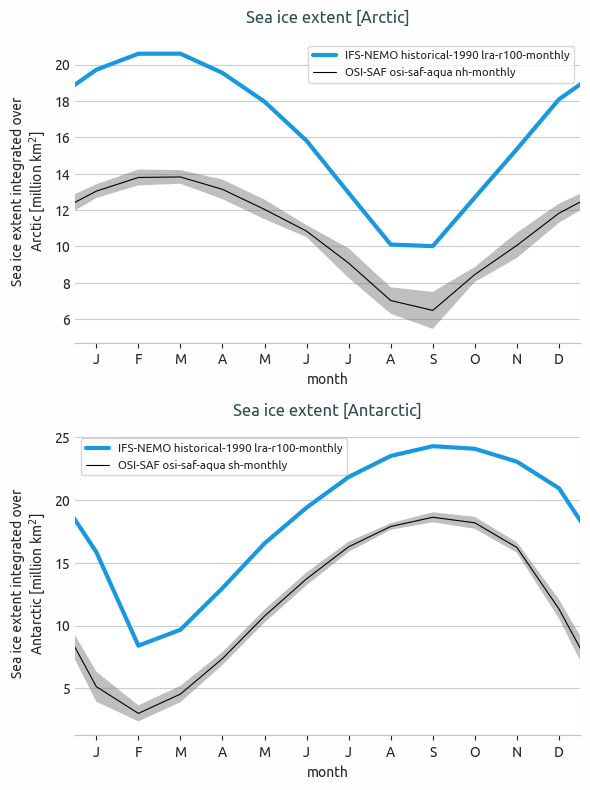

In [6]:
psi = PlotSeaIce(monthly_models=simod,
                 monthly_ref=[siext_ref_nh, siext_ref_sh],
                 monthly_std_ref=[siext_std_ref_nh, siext_std_ref_sh],
                 )
psi.plot_seaice(plot_type='seasonalcycle', save_pdf=False, save_png=False)

## Seaice volume seasonal cycle

### Calculate: model data volume 

In [8]:
method   = 'volume'    # This is the method we want to compute with the seaice data
varname  = 'sithick'   # This is the right variable name relative to the desired method for IFS-NEMO
source   = 'lra-r100-monthly'
regions_domain = ['arctic','antarctic']
regrid='r100'
loglevel = 'info'

seaice_model = SeaIce(model='IFS-NEMO', exp='historical-1990', source=source, regions=regions_domain,
                      startdate='1991-01-01', enddate='2000-01-01',
                      regrid=regrid, loglevel=loglevel)
simod = seaice_model.compute_seaice(method=method, var=varname, 
                                    get_seasonal_cycle=True)

# Reference data
varn = 'sithick'

seaice_ref_nh = SeaIce(model='PSC', exp='PIOMAS', source='monthly', regions='arctic',
                       startdate='1991-01-01', enddate='2000-01-01',
                       regrid=regrid, loglevel=loglevel)
si_ref_nh, si_std_ref_nh = seaice_ref_nh.compute_seaice(method=method, var=varn, 
                                                        calc_std_freq='monthly', 
                                                        get_seasonal_cycle=True)

seaice_ref_sh = SeaIce(model='PSC', exp='GIOMAS', source='monthly', regions='antarctic',
                       startdate='1991-01-01', enddate='2000-01-01', 
                       regrid=regrid, loglevel=loglevel)
si_ref_sh, si_std_ref_sh = seaice_ref_sh.compute_seaice(method=method, var=varn, 
                                                        calc_std_freq='monthly', 
                                                        get_seasonal_cycle=True)

2026-01-29 16:48:17 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2026-01-29 16:48:18 :: FixerConfigure :: INFO     -> Convention dictionary: eccodes-2.39.0
2026-01-29 16:48:18 :: FixerConfigure :: INFO     -> No fixer_name found, only convention will be applied
2026-01-29 16:48:18 :: Reader :: INFO     -> Grid metadata is lon-lat
2026-01-29 16:48:18 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2026-01-29 16:48:18 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2026-01-29 16:48:24 :: DataModel :: INFO     -> Applying data model: aqua
2026-01-29 16:48:24 :: CoordIdentifier :: WARNING  -> Coordinate 'level' assigned to multiple types with identical scores: [('depth', 50), ('height', 50)]. Disabling data model check for this coordinate.
2026-01-29 16:48:24 :: CoordTransformer :: INFO     -> Grid type: Regular
2026-01-29 16:48:24 :: CoordTransformer :: INFO     -> T

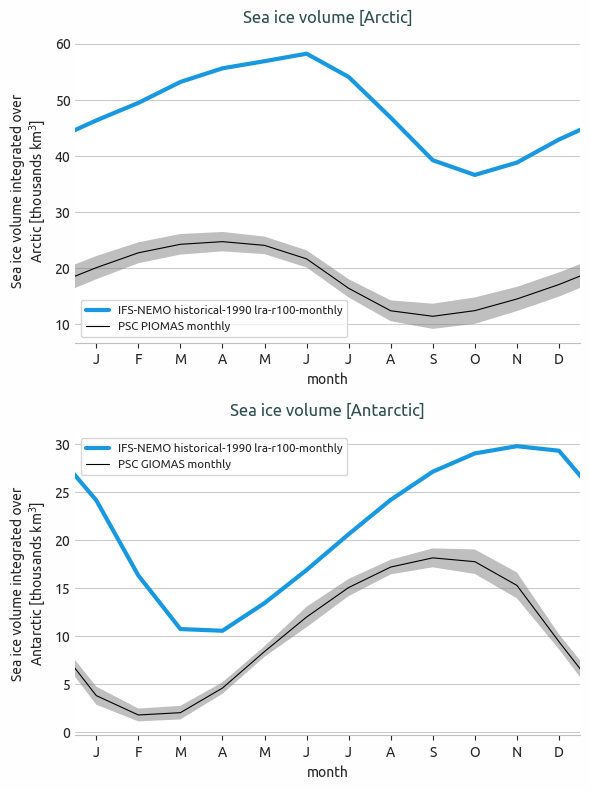

In [9]:
psi = PlotSeaIce(monthly_models=simod,
                 monthly_ref=[si_ref_nh, si_ref_sh],
                 monthly_std_ref=[si_std_ref_nh, si_std_ref_sh],
                 )
psi.plot_seaice(plot_type='seasonalcycle', save_pdf=False, save_png=False)